Imports

In [1]:
#Imports

import os
import requests
import json
import pandas as pd
import numpy as np
import alpaca_trade_api as alpaca
from alpaca_trade_api import REST, TimeFrame


HD Data

In [2]:
# Read HD data from 1.1.2017 - 12.25.21

hd = pd.read_csv("Data/hd.csv",
    index_col="Date",
    parse_dates=True,
    infer_datetime_format=True
)

hd


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2017-01-03,135.100006,135.509995,133.589996,134.309998,119.600647,5299700
2017-01-04,134.339996,135.940002,134.210007,135.500000,120.660309,4055300
2017-01-05,134.979996,135.460007,133.779999,133.899994,119.235527,3821100
2017-01-06,133.970001,134.330002,133.050003,133.529999,118.906075,3827500
2017-01-09,133.220001,134.759995,133.139999,134.309998,119.600647,4310200
...,...,...,...,...,...,...
2021-12-17,396.970001,397.980011,387.420013,387.980011,387.980011,11097500
2021-12-20,384.290009,390.170013,380.899994,389.399994,389.399994,4294800
2021-12-21,391.630005,393.760010,383.239990,390.470001,390.470001,3038200


Plot close price

<AxesSubplot:xlabel='Date'>

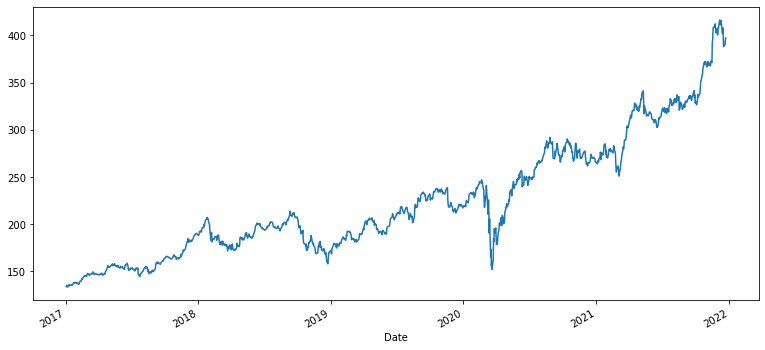

In [3]:
# Plot close price column

hd["Close"].plot(
    figsize=(13,6)
)


Sharpe

In [4]:
# Annual Returns

hd_annual_returns = (hd["Close"].pct_change().dropna()).mean() * 252


# Annual std Deviation

hd_annual_std = ((hd["Close"].pct_change().dropna()).std()) * np.sqrt(252)


# Sharpe

hd_sharpe = hd_annual_returns / hd_annual_std


print(f"returns    {hd_annual_returns}")

print(f"std    {hd_annual_std}")

print(f"sharpe    {hd_sharpe}")


returns    0.2519988318930467
std    0.2582263290156461
sharpe    0.9758835702527372


Sliced - Plot close price

<AxesSubplot:xlabel='Date'>

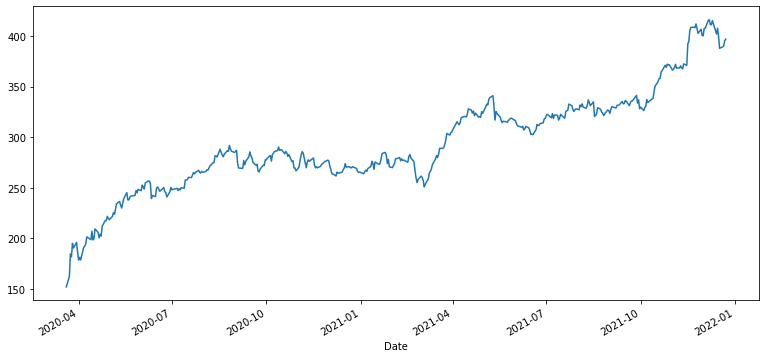

In [5]:
# Plot close price column after pandemic crash

hd_sliced = hd["Close"].loc["2020-3-20":"2021-12-25"]

hd_sliced.plot(
    figsize=(13,6)
)


Sliced - Sharpe

In [6]:
# annual returns

hd_sliced_annual_returns = (hd_sliced.pct_change().dropna()).mean() * 252


# annual std deviation

hd_sliced_annual_std = ((hd_sliced.pct_change().dropna()).std()) * np.sqrt(252)


# sharpe ratio

hd_sliced_sharpe = hd_sliced_annual_returns / hd_sliced_annual_std


print(f"sliced returns    {hd_sliced_annual_returns}")

print(f"sliced std    {hd_sliced_annual_std}")

print(f"sliced sharpe    {hd_sliced_sharpe}")


sliced returns    0.5786688789332923
sliced std    0.26639733637789476
sliced sharpe    2.172202195416956
